In [16]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np

### Q1

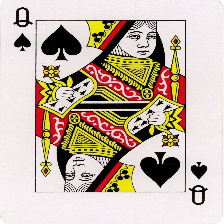

In [10]:
img = Image.open(r"C:\Users\samah\Downloads\cards_dataset\valid\queen of spades\queen of spades1.jpg").convert("RGB")
img

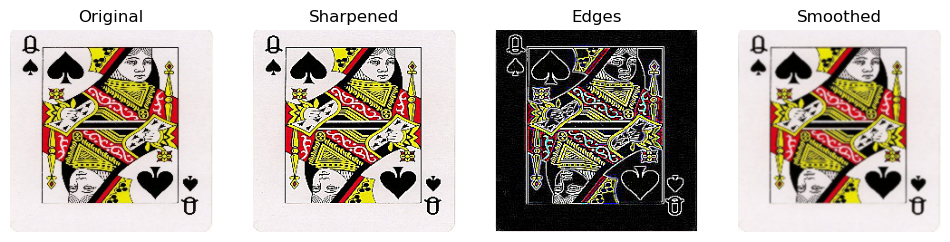

In [18]:
# Applying filters
sharpened = img.filter(ImageFilter.SHARPEN)
edges = img.filter(ImageFilter.FIND_EDGES)
smoothed = img.filter(ImageFilter.SMOOTH)

# Displaying results
filters = {"Original": img, "Sharpened": sharpened, "Edges": edges, "Smoothed": smoothed}

plt.figure(figsize=(12, 6))
for i, (name, filtered_img) in enumerate(filters.items()):
    plt.subplot(1, 4, i + 1)
    plt.title(name)
    plt.imshow(filtered_img)
    plt.axis("off")
plt.show()

The Sharpened filter emphasizes details, enhancing sharpness.

The Edges filter highlights structures, showing boundaries clearly.

The Smoothed filter reduces noise and textures, making the image softer.

Yes, the filter outputs are correctly showing their purpose. The sharpen filter makes the image look crisper and more detailed. The edges filter has Black-and-white output showing edges, hence emphasizing the structural features of the image. The smooth filter blurs the details slightly, creating a smoother appearance.

### Q2

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [81]:
img_2 = Image.open(r"C:\Users\samah\Downloads\Animal Dataset\train\dog\2dogs044.jpg")

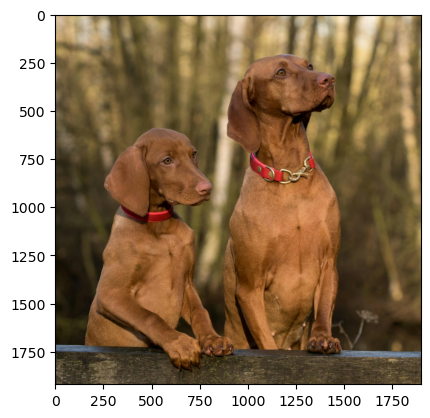

In [83]:
plt.imshow(img_2)
plt.show()

In [85]:
img.mode

'RGB'

In [87]:
M = np.asarray(img)
M.shape

(224, 224, 3)

In [89]:
img_width, img_height = 224, 224

In [118]:
train_data_dir = r"C:\Users\samah\Downloads\Animal Dataset\train"
test_data_dir = r"C:\Users\samah\Downloads\Animal Dataset\test"
nb_train_samples = 50
nb_test_samples = 15
epochs = 25
batch_size = 5

In [120]:
K.image_data_format()

'channels_last'

In [122]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [124]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64)) #fully connected deep learning network
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid'))

In [126]:
import keras
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [128]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit(
    train_generator,
    steps_per_epoch=int(nb_train_samples / batch_size),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps= int(nb_test_samples / batch_size))

Found 206 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.4254 - loss: 0.8627 - val_accuracy: 0.6000 - val_loss: 0.7087
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.3741 - loss: 0.7668 - val_accuracy: 0.5333 - val_loss: 0.6716
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5806 - loss: 0.6901 - val_accuracy: 0.7333 - val_loss: 0.6618
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.4957 - loss: 0.6934 - val_accuracy: 0.5333 - val_loss: 0.6902
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 438ms/step - accuracy: 0.3800 - loss: 0.6983 - val_accuracy: 0.4000 - val_loss: 0.6984
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5121 - loss: 0.6925 - val_accuracy: 0.4667 - val_loss: 0.6935
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.4483 - loss: 0.6972 - val_accuracy: 0.5333 - val_loss: 0.6836
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━

Total Images: 206, balanced across two classes for training and validation.

Initial Performance:

Training Accuracy (Epoch 1): 42.54%

Validation Accuracy (Epoch 1): 60.00%

Observation: High loss values and low accuracy indicate initial underfitting.

Best Results:

Best Training Accuracy: 91.00% (Epoch 25)

Best Validation Accuracy: 86.67% (Epoch 25)

Final Performance:

Training Accuracy (Epoch 25): 91.00%

Validation Accuracy (Epoch 25): 86.67%

Observation: Both training and validation accuracies peaked in the final epoch, showing reduced overfitting compared to earlier iterations.

Key Observations:

Improved Generalization: Validation accuracy aligns well with training accuracy in later epochs.

Consistent Fluctuations: Validation accuracy fluctuates mid-training, highlighting potential sensitivity to batch or architecture hyperparameters.

Optimization: Final results suggest successful training, but further regularization or larger datasets could stabilize earlier fluctuations.

In [131]:
model.save('animal_model.keras')

In [133]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
 
from keras.models import load_model
 
model = load_model('animal_model.keras')

In [177]:
image = load_img(r"C:\Users\samah\Downloads\dog1.jpeg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - cat"
else:
    out = "1 - dog"

print("Class (0-cat , 1-dog) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Class (0-cat , 1-dog) and prediction is:  1 - dog


In [179]:
label[0][0]

0.5026711

In [183]:
image = load_img(r"C:\Users\samah\Downloads\dog2.jpeg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - cat"
else:
    out = "1 - dog"

print("Class (0-cat , 1-dog) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Class (0-cat , 1-dog) and prediction is:  1 - dog


In [185]:
label[0][0]

0.5048385

In [187]:
image = load_img(r"C:\Users\samah\Downloads\dog3.jpeg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - cat"
else:
    out = "1 - dog"

print("Class (0-cat , 1-dog) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Class (0-cat , 1-dog) and prediction is:  0 - cat


In [189]:
label[0][0]

0.48687524

In binary classification, keras will only provide probability of second class (which is class 1)

In [181]:
image = load_img(r"C:\Users\samah\Downloads\cat1.jpeg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - cat"
else:
    out = "1 - dog"

print("Class (0-cat , 1-dog) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Class (0-cat , 1-dog) and prediction is:  0 - cat


In [173]:
label[0][0]

0.4274042

In [197]:
image = load_img(r"C:\Users\samah\Downloads\cat2.jpg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - cat"
else:
    out = "1 - dog"

print("Class (0-cat , 1-dog) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Class (0-cat , 1-dog) and prediction is:  1 - dog


In [199]:
label[0][0]

0.5055144

In [201]:
image = load_img(r"C:\Users\samah\Downloads\cat3.jpeg", target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - cat"
else:
    out = "1 - dog"

print("Class (0-cat , 1-dog) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Class (0-cat , 1-dog) and prediction is:  0 - cat


The classifier cannot accurately classify all images. It mislabelled cat2 as dog and dog3 as cat.